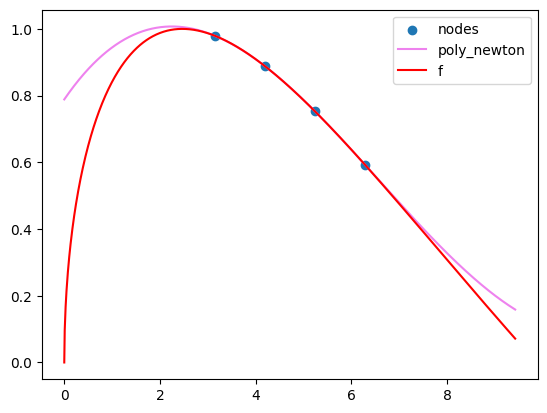

In [17]:
#задача 1

import numpy as np
import matplotlib.pyplot as plt 
import math

def f(x):
    return np.sin(np.sqrt(x))

nodes = np.linspace(math.pi, math.pi*2, 4)
values = np.array([f(nodes[0]), f(nodes[1]), f(nodes[2]), f(nodes[3]),])

def divided_differences(nodes, values):
    if nodes.size == 1:
        return values[0]
    else:
        return (divided_differences(nodes[1:], values[1:]) - divided_differences(nodes[:-1], values[:-1])) / (nodes[-1] - nodes[0]) 

def poly_newton(x):
    poly = 0
    multi = 1
    for i in range(0, nodes.size):
        poly += divided_differences(nodes[:i+1], values[:i+1]) * multi
        multi *= (x - nodes[i])
    return poly    


plt.scatter(nodes, values)
x_axis = np.linspace(0, math.pi*3, 1000)
plt.plot(x_axis, poly_newton(x_axis), color='violet')
plt.plot(x_axis, f(x_axis), color='r')
plt.legend(['nodes', 'poly_newton', 'f'])
plt.show()

In [18]:
print(poly_newton(math.pi / 6))

0.8830562500229304


In [19]:
f(math.pi / 6)

np.float64(0.6620878341416984)

In [ ]:
#очевидно щом има такава разлика приближението не е добро
#това се дължи не на факта, че използваме само 4 възли за интерполация,
#а защото пи/6 е извън диапазона на пресмятанията за възлите, които сме направили

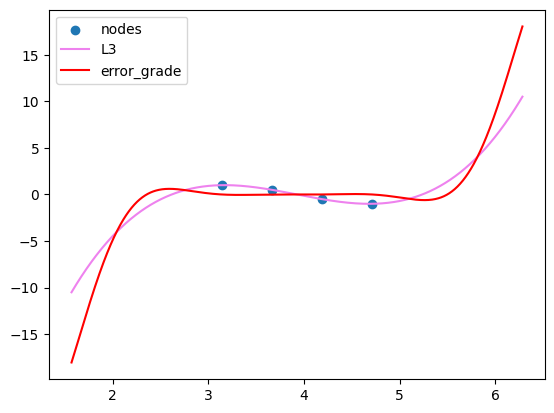

In [29]:
import numpy as np
import matplotlib.pyplot as plt 
import math

def f2(x):
    return np.cos(2*x)

nodes2 = np.array([math.pi, (7*math.pi)/6, (4*math.pi)/3, (3*math.pi)/2])
values2 = np.array([f2(nodes2[0]), f2(nodes2[1]), f2(nodes2[2]), f2(nodes2[3])])

def l0(x):
    return ((x-nodes2[1])*(x-nodes2[2])*(x-nodes2[3])) / ((nodes2[0]-nodes2[1])*(nodes2[0]-nodes2[2])*(nodes2[0]-nodes2[3]))

def l1(x):
    return ((x-nodes2[0])*(x-nodes2[2])*(x-nodes2[3])) / ((nodes2[1]-nodes2[0])*(nodes2[1]-nodes2[2])*(nodes2[1]-nodes2[3]))

def l2(x):
    return ((x-nodes2[1])*(x-nodes2[0])*(x-nodes2[3])) / ((nodes2[2]-nodes2[1])*(nodes2[2]-nodes2[0])*(nodes2[2]-nodes2[3]))

def l3(x):
    return ((x-nodes2[1])*(x-nodes2[2])*(x-nodes2[0])) / ((nodes2[3]-nodes2[1])*(nodes2[3]-nodes2[2])*(nodes2[3]-nodes2[0]))

def L3(x):
    return values2[0]*l0(x) + values2[1]*l1(x) + values2[2]*l2(x) + values2[3]*l3(x) 

def error_grade(x):
    dif4 = (np.cos(2*x))*16
    return (dif4 / math.factorial(4))*(x-nodes2[0])*(x-nodes2[1])*(x-nodes2[2])*(x-nodes2[3])

plt.scatter(nodes2, values2)
x_axis2 = np.linspace(math.pi/2, math.pi*2, 1000)
plt.plot(x_axis2, L3(x_axis2), color='violet')
plt.plot(x_axis2, error_grade(x_axis2), color='r')
plt.legend(['nodes', 'L3', 'error_grade'])
plt.show()

In [18]:
f2(3.6)

np.float64(0.6083513145322546)

In [19]:
L3(3.6)

np.float64(0.609933775436171)

In [28]:
error_grade(3.6)

np.float64(-0.007938208786233794)

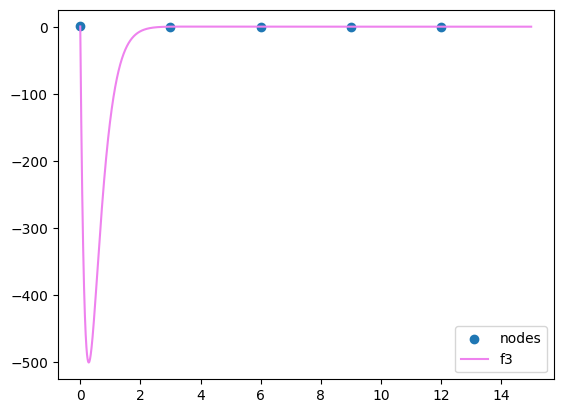

In [49]:
#задача 3

#базис 1 - не е подходящ, тъй като при него следва стойностите да растат експоненциално, а те очевиндо даже намаляват
#базис 2 - ми се струва не ок, защото при него ще се получават като резултат прекалено големи числа, а нашите стойности са доста малки
#базис 3 - би бил ок тъй като стойностите намалват с много, почти експоненциално
#базис 4 - като базис 2
#=> ще използваме базис 3

import numpy as np
import matplotlib.pyplot as plt 
import math

nodes3 = np.array([0, 3, 6, 9, 12])
values3 = np.array([0.3, 0.025, 0.003, 0.00008, 0.0000032])

matrix = np.zeros([5, 5])
for i in range(0, 5):
    for j in range(0, 5):
        matrix[i][j] = math.e**((-1)*j*nodes3[i])

solution = np.linalg.solve(matrix, values3)

def f3(x):
    return solution[0] + solution[1]*math.e**((-1)*x) + solution[2]*math.e**((-1)*x*2) + solution[3]*math.e**((-1)*x*3) + solution[4]*math.e**((-1)*x*4)

plt.scatter(nodes3, values3)
x_axis3 = np.linspace(0, 15, 10000)
plt.plot(x_axis3, f3(x_axis3), color='violet')
plt.legend(['nodes', 'f3'])
plt.show()

In [ ]:
#не знам защо има този рязък спад, струва ми се че премяранията са ок, та може пък и да не съм избрала подходящ базис :) 